<a href="https://colab.research.google.com/github/JuanDlog/Python_Data_Science/blob/main/ETL_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ETL: Extract, transform, load**



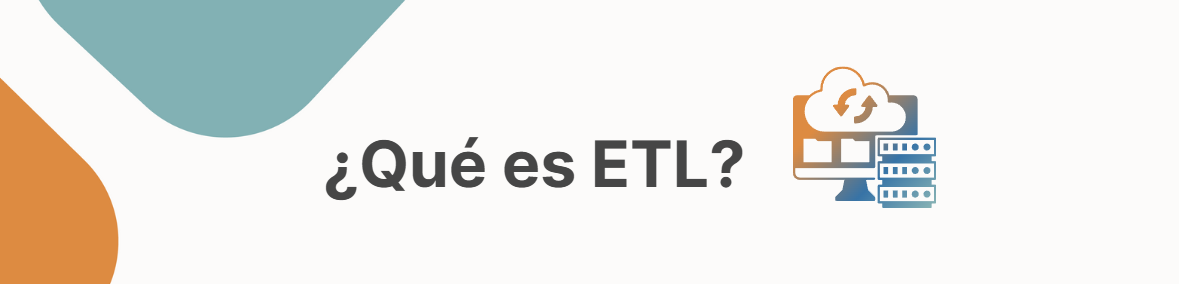

# ETL en el Restaurante: ¿Cómo aumentar las propinas?

## Introducción - El poder de los datos en el restaurante

Imagina que eres el/la gerente de un restaurante y estás buscando formas de aumentar las propinas de los clientes.
Recibiste un conjunto de datos con información sobre las cuentas, las propinas y los perfiles de los clientes.
Tu misión es utilizar el análisis de datos para descubrir patrones y sugerir acciones que aumenten la satisfacción y, por supuesto, las propinas.

Vamos a utilizar el proceso ETL para transformar este desafío en una solución basada en datos.

# Parte 1: Extracción (Extract)

La extracción es la primera etapa del proceso ETL (Extract, Transform, Load). Consiste en obtener los datos desde su fuente de origen.
Existen distintos tipos de extracción:

1. **Desde archivos planos**: como CSV, TXT o Excel. Es común en entornos educativos y análisis exploratorios.
2. **Desde bases de datos**: se conecta directamente a bases como MySQL, PostgreSQL, Oracle, etc.
3. **Desde APIs**: extrae datos en tiempo real o por demanda desde servicios web.
4. **Desde la web (Web Scraping)**: extrae datos directamente de páginas web cuando no hay una API disponible.
5. **Desde almacenamiento en la nube**: como Google Drive, Amazon S3, entre otros.

En nuestro caso, haremos la extracción desde un archivo CSV disponible en la web.

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'

In [4]:
df = pd.read_csv(url)

## Parte 1.5: Exploración inicial de los datos

Antes de transformar los datos, es fundamental conocerlos mejor. Esta etapa de exploración nos ayuda a:

- Identificar posibles errores o valores ausentes.
- Entender la distribución de las variables.
- Detectar relaciones interesantes entre columnas.

Usaremos funciones como `head()`, `info()`, `describe()` y visualizaciones básicas para explorar el dataset.

In [5]:
# Primeras filas del conjunto de datos

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- **total_bill**: Monto total de la cuenta (incluye comida, bebida, etc.).
- **tip**: Propina dada por el cliente.
- **sex**: Sexo de la persona que pagó (Male/Female).
- **smoker**: Indica si la persona pertenece a una mesa de fumadores (Yes/No).
- **day**: Día de la semana en que se registró la cuenta (Thur, Fri, Sat, Sun).
- **time**: Momento del día (Lunch o Dinner).
- **size**: Número de personas en la mesa.

In [6]:
# Información general de las columnas y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
# Estadísticas descriptivas básicas
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Parte 2: Transformación (Transform)

La transformación es una etapa crucial en ETL. En esta fase limpiamos, combinamos o enriquecemos los datos para que estén listos para el análisis.

**¿Por qué transformar?**
- Los datos brutos suelen tener errores o estar desorganizados.
- Es necesario convertirlos a un formato más útil o comprensible.
- Podemos crear nuevas columnas que revelen información oculta (como el porcentaje de propina).

## Funciones comunes en la fase de transformación (tratamiento de datos):

- `df.isnull().sum()`: Verifica valores nulos en cada columna.
- `df.duplicated().sum()`: Identifica registros duplicados.
- `df.drop_duplicates()`: Elimina registros duplicados.
- `df.fillna(valor)`: Rellena valores nulos con un valor específico.
- `df.replace()`: Reemplaza valores específicos por otros.
- `df.astype()`: Convierte el tipo de datos de una columna.
- `df['nueva_columna'] = ...`: Permite crear nuevas columnas derivadas de otras.

Estas funciones nos ayudan a garantizar que los datos estén limpios y listos para un análisis confiable.

A continuación, veremos ejemplos prácticos de cómo aplicar estas funciones sin modificar el DataFrame original:

In [8]:
# Verificar valores nulos
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [10]:
# Verificar valores duplicados
df.duplicated().sum()

np.int64(1)

In [11]:
# Eliminar duplicados (sin afectar df original)
df.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# Cambiar tipo de dato temporal (ejemplo ficticio)
# df['day'] = df['day'].astype('category')  # si quisiéramos tratarlo como categoría


##  Nuevas columnas que revelen información oculta

In [12]:
# Crear la columna de porcentaje de propina
df['propinas_porcentaje'] = df['tip']/df['total_bill']*100

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,propinas_porcentaje
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


# Parte 3: Carga y Análisis (Load)

En esta fase, cargamos los datos en un formato de análisis y visualización, con el objetivo de apoyar la toma de decisiones.
Vamos a generar gráficos y tablas para entender mejor los patrones de propinas.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Estilo de los gráficos

sns.set(style='whitegrid')

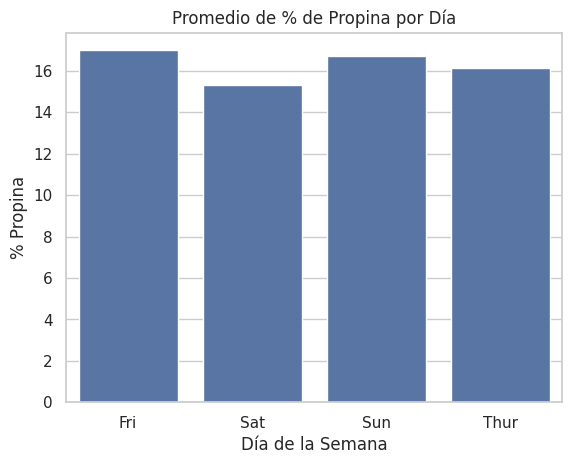

In [16]:
# Propina por día
df_day = df.groupby('day')['propinas_porcentaje'].mean().reset_index()
sns.barplot(data=df_day, x='day', y='propinas_porcentaje')
plt.title('Promedio de % de Propina por Día')
plt.ylabel('% Propina')
plt.xlabel('Día de la Semana')
plt.show()

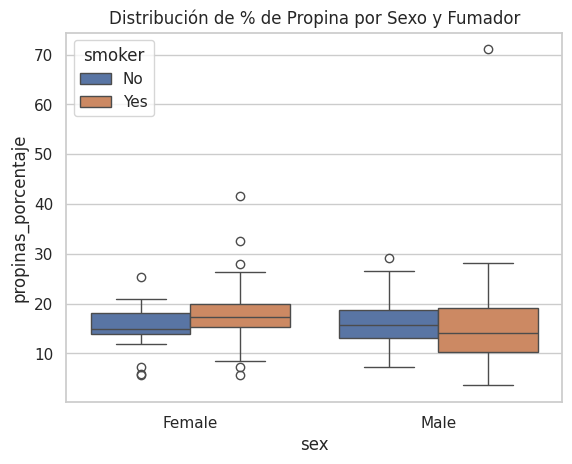

In [18]:
# Propina por sexo y fumante
sns.boxplot(data=df, x='sex', y='propinas_porcentaje', hue='smoker')
plt.title('Distribución de % de Propina por Sexo y Fumador')
plt.show()

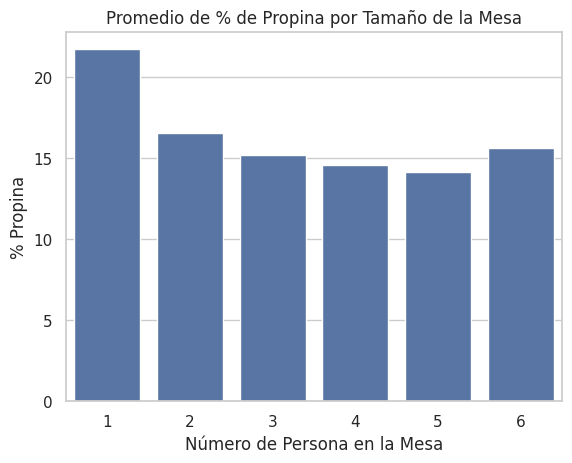

In [21]:
# Propina por tamaño de la mesa
sns.barplot(data=df, x='size', y='propinas_porcentaje', errorbar=None)
plt.title('Promedio de % de Propina por Tamaño de la Mesa')
plt.ylabel('% Propina')
plt.xlabel('Número de Persona en la Mesa')
plt.show()

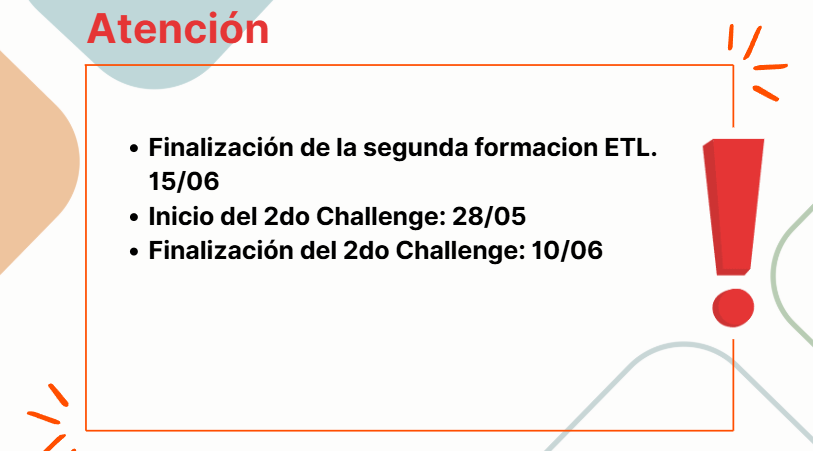